In [14]:
base_dir = 'drive/MyDrive/Unicamp/Reinforcement Learning - 2021.2/gym-minigrid/'

In [20]:
!apt-get install x11-utils > /dev/null 2>&1 
!pip install pyglet > /dev/null 2>&1 
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [21]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [22]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

In [23]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

In [11]:
import sys, os

In [16]:
sys.path.append(base_dir)
# sys.path.append(os.path.join(os.path.dirname(__file__), base_dir))

In [17]:
from project_RL.sarsa.sarsa_lambda_agent import SarsaLambda
from gym_minigrid.wrappers import *
from time import time

In [28]:
def train(env, hyperparameters):
    """ Train a sarsa lambda agent in the requested environment

    Arguments:
        hyperparameters dictionary containing:
            - env_name
            - discount_rate
            - learning_rate
            - epsilon
    """
    agent = SarsaLambda(env, hyperparameters['discount_rate'],
                        hyperparameters['learning_rate'], hyperparameters['epsilon'])

    # initialise variables for plotting purpose
    step = 0

    for episode in range(int(1e4)):
        # reset environment before each episode
        total_reward = 0.0

        agent.init_eligibility_table()
        observation = env.reset()
        state = observation  # TODO: change it after decision regarding state
        action = agent.get_new_action_e_greedly(state)
        done = False

        # env.render()
        while not done:
            observation, reward, done, info = env.step(action)
            next_state = observation  # TODO: change it after decision regarding state
            total_reward += reward
            next_action = agent.get_new_action_e_greedly(next_state)

            # t0 = time()
            agent.update(state, action, reward, next_state, next_action, done)
            # print(f'{time() - t0} elapsed.')

            state = next_state
            action = next_action
            # env.render()
            # print("a:", action, "i:", step, "reward:", reward, "info:", info)
            if done:
                # env.render()
                if episode % 100 == 0: # total_reward > 0.0 and 
                    # print("done?", done, "total reward:", total_reward, "info:", info)
                    play(env, agent)
            step += 1
    env.close()
    return agent


def play(env, agent, episodes=1):
    for episode in range(episodes):
        # reset environment before each episode
        observation = env.reset()
        state = observation  # TODO: change it after decision regarding state
        action = agent.get_new_action_e_greedly(state)
        done = False
        total_reward = 0

        prev_screen = env.render(mode='rgb_array')
        plt.imshow(prev_screen)
        while not done:
            observation, reward, done, info = env.step(action)

            screen = env.render(mode='rgb_array')
            plt.imshow(screen)
            ipythondisplay.clear_output(wait=True)
            ipythondisplay.display(plt.gcf())

            next_state = observation  # TODO: change it after decision regarding state
            total_reward += reward
            action = agent.get_new_action_e_greedly(next_state)
        # print(f'Total reward: {total_reward}')

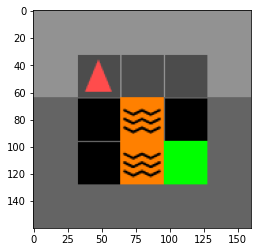

In [ ]:
if __name__ == '__main__':
    hyperparameters = {
        # 'env_name': 'MiniGrid-Empty-8x8-v0',
        # 'env_name': 'MiniGrid-FourRooms-v0',
        # 'env_name': 'MiniGrid-Empty-Random-6x6-v0',
        # 'env_name': 'MiniGrid-Empty-16x16-v0',
        # 'env_name': 'MiniGrid-DistShift1-v0',
        'env_name': 'MiniGrid-LavaGapS5-v0',
        'discount_rate': 0.9,
        'learning_rate': 0.01,
        'epsilon': 0.3
    }

    env = gym.make(hyperparameters['env_name'])
    agent = train(env, hyperparameters)